In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso,Ridge


In [15]:
import pandas as pd
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df=pd.read_csv('housing.csv',header=None, delimiter=r"\s+",names=column_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [16]:
x=df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]
y=df[['MEDV']]

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [21]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((404, 13), (102, 13), (404, 1), (102, 1))

In [29]:
lasso=Lasso(alpha=0.1)
lasso.fit(x_train,y_train)
y_pred_lasso=lasso.predict(x_test)


In [30]:
redge=Ridge(alpha=0.1)
redge.fit(x_train,y_train)
y_pred_ridge=redge.predict(x_test)


In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [31]:
print("MSE of the lasso regression:",mean_squared_error(y_test,y_pred_lasso))
print("MSE of Ridge regression :",mean_squared_error(y_test,y_pred_ridge))


MSE of the lasso regression: 25.155593753934173
MSE of Ridge regression : 24.301025500192736


In [33]:
print("MAE of the lasso regression:",mean_absolute_error(y_test,y_pred_lasso))
print("MAE of Ridge regression :",mean_absolute_error(y_test,y_pred_ridge))

MAE of the lasso regression: 3.1452398674037196
MAE of Ridge regression : 3.1788559832344774


In [35]:
# Display features with non-zero coefficients
lasso_coefficients = pd.Series(lasso.coef_, index=x.columns)
selected_features = lasso_coefficients[lasso_coefficients != 0]

print("Selected Features by Lasso:\n", selected_features)


Selected Features by Lasso:
 CRIM      -0.104157
ZN         0.034893
INDUS     -0.016785
CHAS       0.919952
RM         4.311687
AGE       -0.015126
DIS       -1.151487
RAD        0.239237
TAX       -0.012962
PTRATIO   -0.732247
B          0.013091
LSTAT     -0.564674
dtype: float64


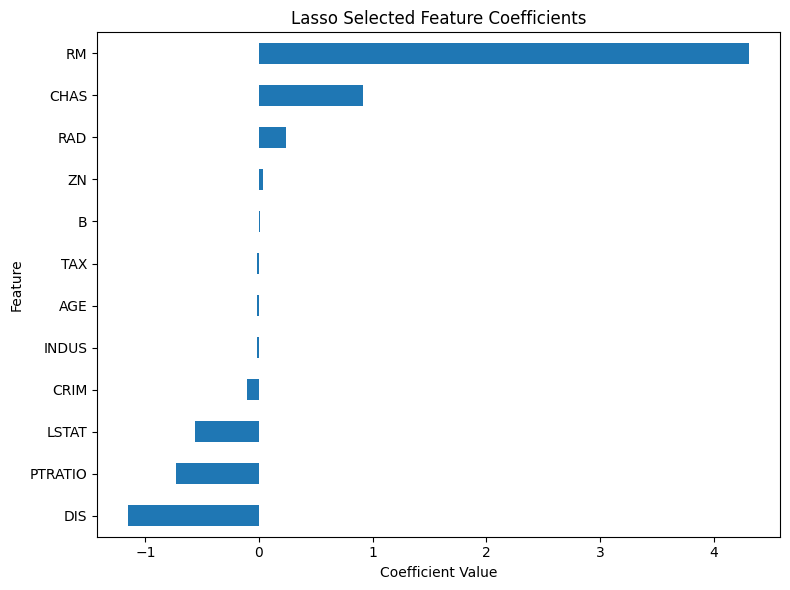

In [36]:
import matplotlib.pyplot as plt

selected_features.sort_values().plot(kind='barh', figsize=(8, 6))
plt.title("Lasso Selected Feature Coefficients")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [45]:
lassocoeff=pd.Series(lasso.coef_,index=x.columns)
selected_features=lassocoeff[lassocoeff != 0]
selected_features

CRIM      -0.104157
ZN         0.034893
INDUS     -0.016785
CHAS       0.919952
RM         4.311687
AGE       -0.015126
DIS       -1.151487
RAD        0.239237
TAX       -0.012962
PTRATIO   -0.732247
B          0.013091
LSTAT     -0.564674
dtype: float64

In [47]:
dominantfeature=selected_features.abs().idxmax()
dominantvalue=selected_features[dominantfeature]
dominantvalue
dominantfeature


'RM'